In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import validation_curve
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn import metrics
import seaborn as sns

D:\Anaconda\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
D:\Anaconda\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
D:\Anaconda\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
D:\Anaconda\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
D:\Anaconda\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [2]:
import os

In [3]:
os.chdir("E:\Data Science\R\PROJECTS\PROJECT 10\Dataset\Dataset")

In [4]:
# load the file
bankdata = pd.read_csv("BankCreditCard.csv")

In [5]:
bankdata.head()

,Customer ID,Credit_Amount,Gender,Academic_Qualification,Marital,Age_Years,Repayment_Status_Jan,Repayment_Status_Feb,Repayment_Status_March,Repayment_Status_April,...,April_Bill_Amount,May_Bill_Amount,June_Bill_Amount,Previous_Payment_Jan,Previous_Payment_Feb,Previous_Payment_March,Previous_Payment_April,Previous_Payment_May,Previous_Payment_June,Default_Payment
0,1,20000.0,2,2,1,24,2,2,0,0,...,0.0,0.0,0.0,0.0,679.0,0.0,0.0,0.0,0.0,1
1,2,220000.0,2,2,2,26,0,2,0,0,...,3272.0,3455.0,3261.0,0.0,2000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,24332.0,14848.0,15548.0,1619.0,2500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,29324.0,28858.0,28547.0,3000.0,2029.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,0,0,0,0,...,20940.0,18146.0,18131.0,3000.0,36672.0,10000.0,9000.0,689.0,679.0,0


In [6]:
bankdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
Customer ID               30000 non-null int64
Credit_Amount             30000 non-null float64
Gender                    30000 non-null int64
Academic_Qualification    30000 non-null int64
Marital                   30000 non-null int64
Age_Years                 30000 non-null int64
Repayment_Status_Jan      30000 non-null int64
Repayment_Status_Feb      30000 non-null int64
Repayment_Status_March    30000 non-null int64
Repayment_Status_April    30000 non-null int64
Repayment_Status_May      30000 non-null int64
Repayment_Status_June     30000 non-null int64
Jan_Bill_Amount           30000 non-null float64
Feb_Bill_Amount           30000 non-null float64
March_Bill_Amount         30000 non-null float64
April_Bill_Amount         30000 non-null float64
May_Bill_Amount           30000 non-null float64
June_Bill_Amount          30000 non-null float64
Previous_Payment_Jan      30000

In [7]:
bankdata['Default_Payment'].value_counts()

0    23364
1     6636
Name: Default_Payment, dtype: int64

In [8]:
bankdata.drop(['Customer ID'], axis=1, inplace=True)

In [9]:
bankdata.shape

(30000, 24)

In [10]:
cor_plot = bankdata.corr()

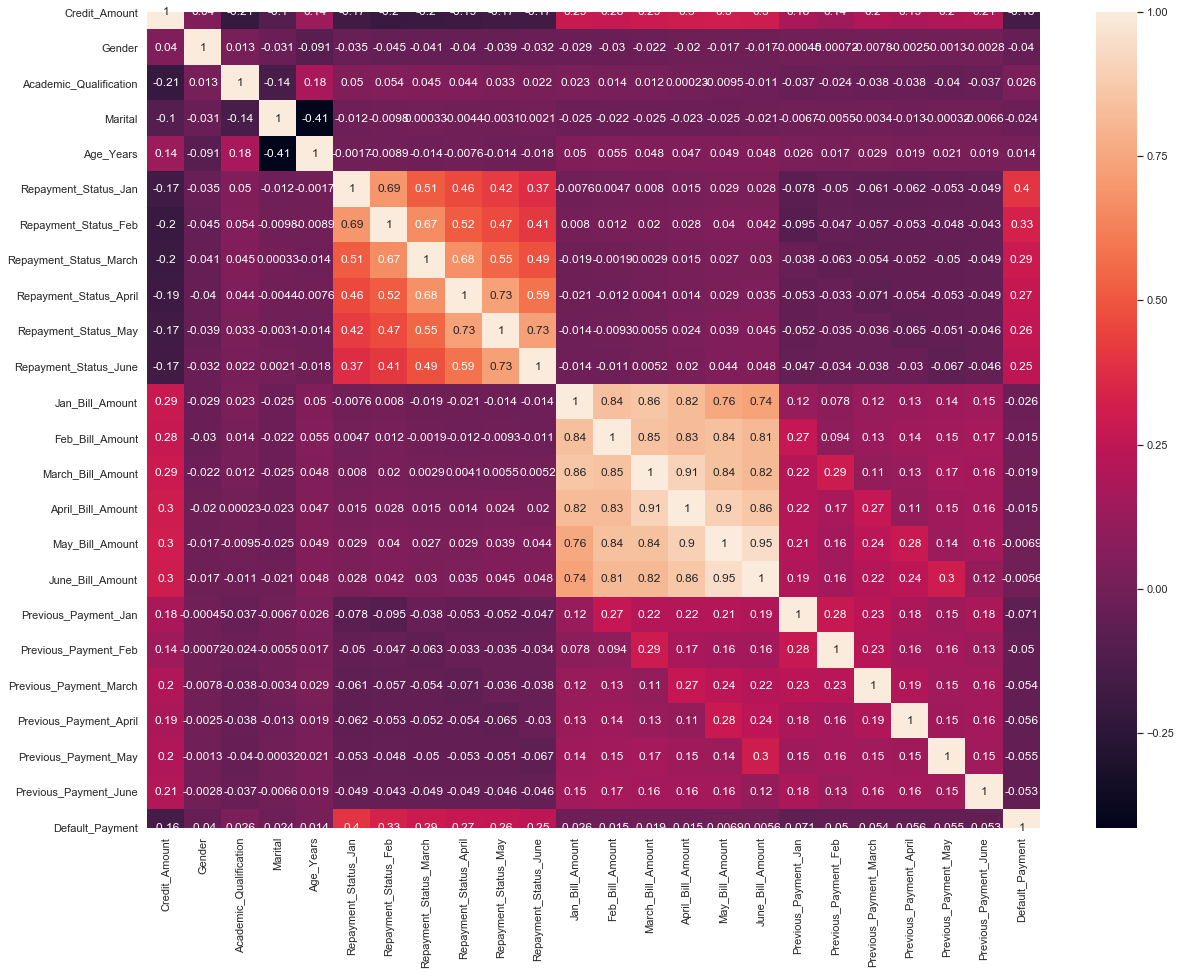

In [11]:
sns.set(rc={"figure.figsize":(20,15)})
sns.heatmap(data=cor_plot, annot=True)

In [12]:
# splitting the data
x = bankdata.drop(['Default_Payment'], axis=1)
y = bankdata['Default_Payment']

In [13]:
x.shape

(30000, 23)

In [14]:
from sklearn.preprocessing import StandardScaler

In [15]:
scaler = StandardScaler()

In [16]:
X = scaler.fit_transform(x)

In [17]:
from sklearn.decomposition import PCA

D:\Anaconda\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [18]:
pca = PCA(n_components=23)

In [19]:
X1 = pca.fit_transform(X)

In [20]:
var = np.cumsum(np.round(pca.explained_variance_ratio_,decimals = 4)*100)
var

array([ 24.64,  41.59,  48.65,  55.24,  59.83,  64.25,  68.37,  72.27,
        76.09,  79.9 ,  83.36,  86.57,  89.19,  91.56,  93.73,  95.24,
        96.56,  97.66,  98.51,  99.2 ,  99.63,  99.86, 100.  ])

In [21]:
X1 = pd.DataFrame(X1)

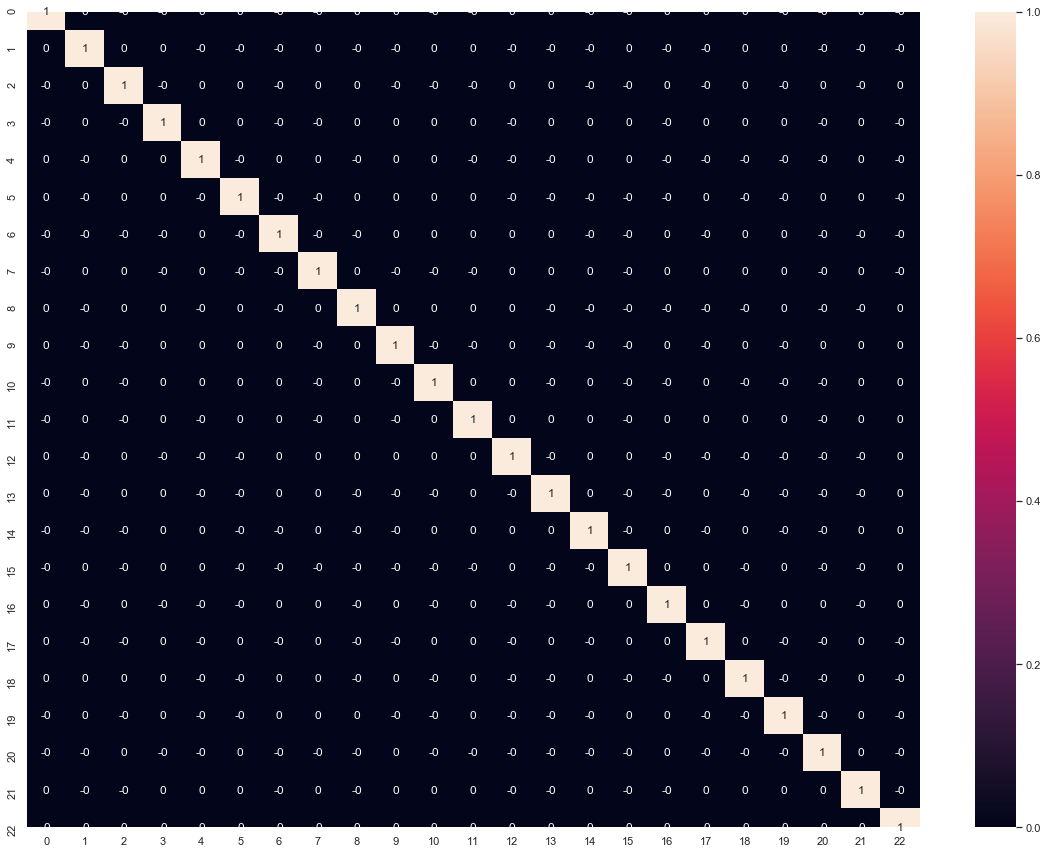

In [22]:
sns.set(rc={"figure.figsize":(20,15)})
corelation_matrix= X1.corr().round(2)
sns.heatmap(data=corelation_matrix, annot=True)

In [23]:
#  split the data into train and test
x_train,x_test,y_train,y_test=train_test_split(X1,y,test_size=0.3, random_state=4)

In [24]:
print(y_train.mean())
print(y_test.mean())

0.21928571428571428
0.22566666666666665


In [ ]:
# Model Building
Let's fist build two basic models - linear and non-linear with default hyperparameters, and compare the accuracies.


In [25]:
model_linear = SVC(kernel='linear')
model_linear.fit(x_train, y_train)

# Predict
y_pred = model_linear.predict(x_test)

In [29]:
# confusion matrix and accuracy

# accuracy
print("accuracy:", metrics.accuracy_score(y_test, y_pred), "\n")

accuracy: 0.8161111111111111 



In [31]:
print(metrics.confusion_matrix(y_test,y_pred))

[[6633  336]
 [1319  712]]


In [32]:
# error rate
print("error rate:", (1319+336)/(6633+336+1319+712)*100)

error rate: 18.38888888888889


In [ ]:
# The linear model gives approx. 81.61% accuracy. Let's look at a sufficiently non-linear model with randomly 
# chosen hyperparameters.

In [33]:
# non-linear model
# using rbf kernel, C=1, default value of gamma

# model
model_non_linear = SVC(kernel='rbf')

# fit
model_non_linear.fit(x_train, y_train)

# Predict
y_pred_NL = model_non_linear.predict(x_test)

D:\Anaconda\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [39]:
# accuracy
print("accuracy:", metrics.accuracy_score(y_test, y_pred_NL))

accuracy: 0.8163333333333334


In [40]:
# confusion matrix
metrics.confusion_matrix(y_test, y_pred_NL)

array([[6643,  326],
       [1327,  704]], dtype=int64)

In [ ]:
# The non-linear model gives approx. 81.633% accuracy. Thus, going forward, let's choose hyperparameters corresponding 
# to non-linear models.

### Grid Search: Hyperparameter Tuning
### Lets now tune the model to find the optimal value of C and gamma corresponding to an RBF kernel. we will use 5 fold CV

In [41]:
# creating a Kfold object with 5 splits
folds = KFold(n_splits=5, shuffle=True, random_state=101)

# specifying range of Hyperparameters
# Set the parameters by cross validation

hyper_para = [{"gamma": [1e-2, 1e-3, 1e-4],
              "C": [1,10,100,1000]}]

# Specify model

model = SVC(kernel="rbf")

# set up grid search CV
model_cv = GridSearchCV(estimator=model, 
                        param_grid=hyper_para, 
                        cv=folds, 
                        scoring="accuracy",
                        verbose=1,
                       return_train_score=True)

# fit the model
model_cv.fit(x_train,y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed: 69.0min finished


GridSearchCV(cv=KFold(n_splits=5, random_state=101, shuffle=True),
             error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid=[{'C': [1, 10, 100, 1000],
                          'gamma': [0.01, 0.001, 0.0001]}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='accuracy', verbose=1)

In [42]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results 

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,13.584655,0.161618,1.349877,0.063424,1,0.01,"{'C': 1, 'gamma': 0.01}",0.824524,0.820714,0.809286,...,0.818429,0.005106,9,0.819464,0.817024,0.824048,0.822024,0.818988,0.820310,0.002456
1,12.158401,0.928115,1.452194,0.127026,1,0.001,"{'C': 1, 'gamma': 0.001}",0.820714,0.826667,0.813571,...,0.821286,0.004834,4,0.823036,0.819464,0.824940,0.822917,0.822024,0.822476,0.001781
2,13.669792,0.808474,1.685744,0.063292,1,0.0001,"{'C': 1, 'gamma': 0.0001}",0.805952,0.806905,0.791667,...,0.801667,0.005650,12,0.801667,0.800238,0.804702,0.802440,0.800952,0.802000,0.001537
3,27.107749,1.113978,1.616093,0.115604,10,0.01,"{'C': 10, 'gamma': 0.01}",0.825952,0.830000,0.814048,...,0.822429,0.005478,1,0.827798,0.825893,0.830595,0.829405,0.827619,0.828262,0.001612
4,15.819305,0.164087,1.608492,0.027150,10,0.001,"{'C': 10, 'gamma': 0.001}",0.823095,0.820952,0.812857,...,0.820048,0.003811,6,0.823036,0.813036,0.825774,0.823512,0.822500,0.821571,0.004411
5,13.639380,0.208994,1.633294,0.024937,10,0.0001,"{'C': 10, 'gamma': 0.0001}",0.821190,0.829286,0.813095,...,0.821857,0.005655,3,0.822321,0.820298,0.824583,0.822738,0.821012,0.822190,0.001484
6,73.403199,3.383573,1.595691,0.124378,100,0.01,"{'C': 100, 'gamma': 0.01}",0.821905,0.826667,0.810476,...,0.819095,0.005338,7,0.836429,0.834226,0.837500,0.835595,0.836310,0.836012,0.001081
7,43.807106,3.295753,1.657695,0.014747,100,0.001,"{'C': 100, 'gamma': 0.001}",0.823571,0.819286,0.806905,...,0.816476,0.005623,10,0.817798,0.814643,0.821071,0.820476,0.816488,0.818095,0.002413
8,17.852021,0.939585,1.651495,0.063061,100,0.0001,"{'C': 100, 'gamma': 0.0001}",0.822857,0.828571,0.813571,...,0.822095,0.004915,2,0.822738,0.820714,0.825179,0.823274,0.822024,0.822786,0.001472
9,324.510507,23.791453,1.683296,0.118949,1000,0.01,"{'C': 1000, 'gamma': 0.01}",0.810714,0.816667,0.803810,...,0.810143,0.004092,11,0.851310,0.851726,0.854048,0.852024,0.852381,0.852298,0.000943


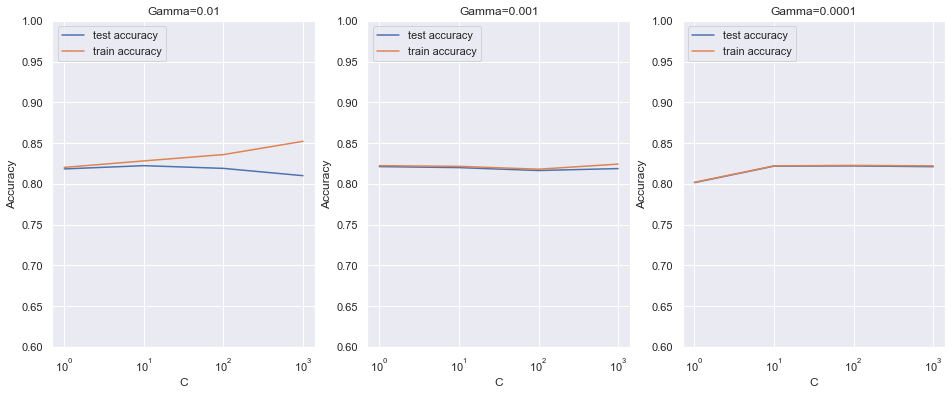

In [43]:
# converting C to numeric type for plotting on x-axis
cv_results['param_C'] = cv_results['param_C'].astype('int')

# # plotting
plt.figure(figsize=(16,6))

# subplot 1/3
plt.subplot(131)
gamma_01 = cv_results[cv_results['param_gamma']==0.01]

plt.plot(gamma_01["param_C"], gamma_01["mean_test_score"])
plt.plot(gamma_01["param_C"], gamma_01["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.01")
plt.ylim([0.60, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')

# subplot 2/3
plt.subplot(132)
gamma_001 = cv_results[cv_results['param_gamma']==0.001]

plt.plot(gamma_001["param_C"], gamma_001["mean_test_score"])
plt.plot(gamma_001["param_C"], gamma_001["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.001")
plt.ylim([0.60, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')


# subplot 3/3
plt.subplot(133)
gamma_0001 = cv_results[cv_results['param_gamma']==0.0001]

plt.plot(gamma_0001["param_C"], gamma_0001["mean_test_score"])
plt.plot(gamma_0001["param_C"], gamma_0001["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.0001")
plt.ylim([0.60, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')

In [44]:
# printing the optimal accuracy score and hyperparameters
best_score = model_cv.best_score_
best_hyperparams = model_cv.best_params_

print("The best test score is {0} corresponding to hyperparameters {1}".format(best_score, best_hyperparams))

The best test score is 0.8224285714285714 corresponding to hyperparameters {'C': 10, 'gamma': 0.01}


In [ ]:
# Building and Evaluating the Final Model
# Let's now build and evaluate the final model, i.e. the model with highest test accuracy.

In [45]:
# model with optimal hyperparameters

# model
model = SVC(C = 10, gamma = .01, kernel='rbf')

model.fit(x_train,y_train)
y_pred = model.predict(x_test)

# metrics
print("accuracy", metrics.accuracy_score(y_test, y_pred), "\n")
print(metrics.confusion_matrix(y_test, y_pred), "\n")

accuracy 0.8158888888888889 

[[6633  336]
 [1321  710]] 



In [48]:
# model with optimal hyperparameters

# model
model = SVC(C = 1000, gamma = .001, kernel='rbf')

model.fit(x_train,y_train)
y_pred = model.predict(x_test)

# metrics
print("accuracy", metrics.accuracy_score(y_test, y_pred), "\n")
print(metrics.confusion_matrix(y_test, y_pred), "\n")

accuracy 0.8154444444444444 

[[6663  306]
 [1355  676]] 



In [49]:
# model with optimal hyperparameters

# model
model = SVC(C = 10, gamma = .0001, kernel='rbf')

model.fit(x_train,y_train)
y_pred = model.predict(x_test)

# metrics
print("accuracy", metrics.accuracy_score(y_test, y_pred), "\n")
print(metrics.confusion_matrix(y_test, y_pred), "\n")

accuracy 0.8163333333333334 

[[6605  364]
 [1289  742]] 

